# Support Vector Machine with Sequential Minimal Optimization

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [28]:
def takeStep(i1, i2, X, y, alphaList, C, kernel, epsilon):
    if (i1 == i2):
        return False
    alpha_1 = alphaList[i1]
    alpha_2 = alphaList[i2]
    y_1 = y[i1]
    y_2 = y[i2]
    x_1 = X[i1]
    x_2 = X[i2]
    w = np.dot(y * alphaList, X) # w.size == X.shape[1]
    bList = np.dot(w.T, X.T) - y
    bList = bList[alphaList > epsilon]
    b = np.mean(bList)
    # check eq (10)
    E_1 = (np.dot(w, x_1) - b) - y_1
    E_2 = (np.dot(w, x_2) - b) - y_2
    s = y_1 * y_2
    #
    L = 0
    H = 0
    if (y_1 != y_2):
        L = max(0, alpha_2 - alpha_1)
        H = min(C, C + alpha_2 - alpha_1)
    else:
        L = max(0, alpha_2 + alpha_1 - C)
        H = min(C, alpha_2 + alpha_1)
    if (L == H):
        return False
    eta = kernel(x_1, x_1) + kernel(x_2, x_2) - 2 * kernel(x_1, x_2)
    alpha_2_new_clipped = 0
    if (eta > 0):
        alpha_2_new = alpha_2 + y_2 * (E_1 - E_2) / eta
        alpha_2_new_clipped = alpha_2_new
        if (alpha_2_new >= H):
            alpha_2_new_clipped = H
        elif (alpha_2_new <= L):
            alpha_2_new_clipped = L
    else:
        print("TODO")
        return False
    if (np.abs(alpha_2_new_clipped - alpha_2) < epsilon * (alpha_2_new_clipped + alpha_2 + epsilon)):
        return False
    alpha_1_new = alpha_1 + s * (alpha_2 - alpha_2_new_clipped)
    #
    alphaList[i1] = alpha_1_new
    alphaList[i2] = alpha_2_new_clipped
    return True

In [32]:
def examineExample(i2, X, y, alphaList, C, kernel, epsilon):
    alpha_2 = alphaList[i2]
    y_2 = y[i2]
    x_2 = X[i2]
    w = np.dot(y * alphaList, X) # w.size == X.shape[1]
    bList = np.dot(w.T, X.T) - y
    bList = bList[alphaList > epsilon]
    b = np.mean(bList)
    E_2 = (np.dot(w, x_2) - b) - y_2
    r_2 = E_2 * y_2
    # TODO
    indeces = np.arange(y.size)
    np.random.shuffle(indeces)
    for i1 in indeces:
        if (takeStep(i1, i2, X, y, alphaList, C, kernel, epsilon)):
            return 1
    return 0

In [4]:
def load_data():
    iris = load_iris()
    X = iris.data[:100, :2]
    y = iris.target[:100]
    y[np.where(y == 0)] = -1
    return X, y

In [5]:
def plot_scatter_2d(x, y, i, j, feature_names = []):
    plt.clf()
    for k in np.unique(y):
        x_k = x[np.argwhere(y == k).flatten()]
        plt.scatter(x_k[:, i], x_k[:, j])
    if feature_names != []:
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
    plt.show()

In [6]:
def plot_with_line(x, y, i, j, x1_list, x2_list, feature_names = []):
    plt.clf()
    plt.plot(x1_list, x2_list, "black")
    for k in np.unique(y):
        x_k = x[np.argwhere(y == k).flatten()]
        plt.scatter(x_k[:, i], x_k[:, j])
    if feature_names != []:
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
    plt.show()

In [7]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

TODO
14
[  0.00000000e+00   1.48821000e+01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.22044605e-16   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.11022302e-16
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -2.77555756e-17
   1.35320416e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
[ 2.85714286 -4.05017526]
[ 2.84947422  2.84947422]


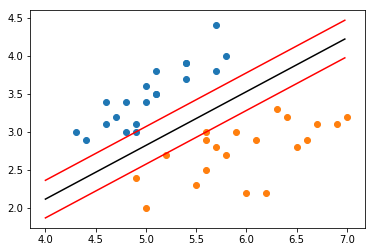

end


In [44]:
X, y = load_data()
X = np.r_[X[0:20, :], X[50:70, :]]
y = np.r_[y[0:20], y[50:70]]


n = y.size
alphaList = np.random.rand(n)
C = 1000
epsilon = 1e-3

numChanged = 0
examineAll = True

count = 0

while (numChanged > 0 or examineAll):
    count += 1
    numChanged = 0
    if (examineAll):
        for i in range(n):
            i2 = i
            numChanged += examineExample(i2, X, y, alphaList, C, linear_kernel, epsilon)
    else:
        for i in range(n):
            alpha_i = alphaList[i]
            if (alpha_i != 0 and alpha_i != C):
                i2 = i
                numChanged += examineExample(i2, X, y, alphaList, C, linear_kernel, epsilon)
    if (examineAll):
        examineAll = False
    elif (numChanged == 0):
        examineAll = True

print(count)
print(alphaList)

w = np.dot(y * alphaList, X)
bList = np.dot(w.T, X.T) - y
bList = bList[alphaList > epsilon]
print(w)
print(bList)
b = np.mean(bList)
x1_list = np.arange(4, 7, 0.02)
x2_list = x1_list * -w[0] / w[1] + b / w[1]
x2_support_top_list = x1_list * -w[0] / w[1] + (b + 1) / w[1]
x2_support_bottom_list = x1_list * -w[0] / w[1] + (b - 1) / w[1]

plt.clf()
plt.plot(x1_list, x2_list, "black")
plt.plot(x1_list, x2_support_top_list, "red")
plt.plot(x1_list, x2_support_bottom_list, "red")
for k in np.unique(y):
    x_k = X[np.argwhere(y == k).flatten()]
    plt.scatter(x_k[:, 0], x_k[:, 1])
plt.show()
print("end")